In [14]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
sys.path.insert(1, oj(sys.path[0], '../vision_fit'))  # insert parent path
import time
import numpy as np
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch
from torch.autograd import Variable
import torchvision.models as models
import warnings
warnings.filterwarnings("ignore")
import data
from max_corr_cnns import get_model_pretrained, lays_and_names
import matplotlib.pyplot as plt
import seaborn as sns
# import style
from collections import OrderedDict
import style

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
style.set_style()
import warnings
warnings.filterwarnings("ignore")

In [16]:
model_names_list = ['vgg11']# ['alexnet', 'vgg11', 'vgg19', 'resnet18']

vgg11


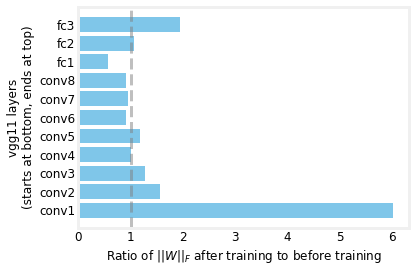

In [18]:
# loop over some different models
for i, model_name in enumerate(model_names_list):
    print(model_name)
    model_init = get_model_pretrained(model_name, pretrained=False)
    model_trained = get_model_pretrained(model_name, pretrained=True)
    
    # calculate weight ratios
    lays, norm_ratios = [], [] 
    for x_init, x_trained in zip(model_init.named_parameters(), model_trained.named_parameters()):
        if 'weight' in x_init[0]:
            lays.append(x_init[0].replace('.weight', ''))
            norm_ratios.append(x_trained[1].norm().item() / x_init[1].norm().item())

    # for vgg11    
    lays = ['conv1', 'conv2', 'conv3', 'conv4', 
            'conv5', 'conv6', 'conv7', 'conv8',
            'fc1', 'fc2', 'fc3']    
    # bar plots of learning    
    plt.cla()
    plt.barh(lays, norm_ratios)
    plt.xlabel('Ratio of $||W||_F$ after training to before training')
    plt.ylabel(model_name + ' layers\n(starts at bottom, ends at top)')
    plt.axvline(1.0, linestyle='--', color='gray', alpha=0.5)
    plt.grid(False)
    plt.tight_layout()
    plt.savefig('cnn_norm_changes/' + model_name + '.pdf', facecolor='w', edgecolor='none')
    